In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [39]:
file_path = r'C:\Users\adita\OneDrive\Desktop\Learnathon 4.0\Learnathon-4.0\Datasets\Auto_Insurance_Fraud_Claims_File01.csv'
df = pd.read_csv(file_path)


# <a id='toc1_'></a>[<b>Load Dataset</b>](#toc0_)


In [40]:

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print(" Dataset loaded successfully!")
except Exception as e:
    print(" Error loading dataset:", e)
    exit()

# 1. Preview first 5 rows
print("\n First 5 Rows:")
print(df.head())

# 2. Dataset shape
print(f"\n Dataset Shape: {df.shape} (rows, columns)")

# 3. Column names and data types
print("\n Data Types:")
print(df.dtypes)

# 4. Summary statistics for numeric columns
print("\n Summary Statistics:")
print(df.describe())

# 5. Count of missing values
print("\n Missing Values:")
print(df.isnull().sum())

# 6. Count of duplicate rows
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates}")

 Dataset loaded successfully!

 First 5 Rows:
     Claim_ID Bind_Date1  Customer_Life_Value1  Age_Insured  Policy_Num  \
0  AA00000001   1/1/2023                    12           28   123790687   
1  AA00000002   1/1/2023                    12           31   129044473   
2  AA00000003   7/1/2022                    18           50   146863149   
3  AA00000004   1/1/2023                    12           37   163100869   
4  AA00000005   3/1/2022                    22           28   185582958   

  Policy_State Policy_Start_Date Policy_Expiry_Date Policy_BI  Policy_Ded  \
0           OH        10/13/2023          4/13/2024  500/1000        1000   
1           IL        10/21/2023          4/21/2024   250/500         500   
2           OH        11/26/2023          5/26/2024  500/1000         500   
3           IL          8/8/2023           2/8/2024  500/1000        1000   
4           OH        11/12/2023          5/12/2024   250/500        1000   

   Policy_Premium  Umbrella_Limit  Insur

# <a ></a>[<b>Data cleaning</b>](#toc0_)


In [41]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset

print("✅ Initial data loaded!")
print(f"📊 Initial shape: {df.shape}")

# 1. Remove duplicate rows
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"🧹 Removed {before - after} duplicate rows")

# 2. Identify missing values
total_missing = df.isnull().sum()
missing_cols = total_missing[total_missing > 0]
print(f"\n🔍 Columns with missing values:\n{missing_cols}")

# 3. Drop columns with >30% missing values
threshold = 0.3
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\n🗑️ Dropped columns with >30% missing values: {list(cols_to_drop)}")

# 4. Fill remaining missing numeric values with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_missing_before = df[numeric_cols].isnull().sum().sum()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
num_missing_after = df[numeric_cols].isnull().sum().sum()
print(f"🧮 Filled {num_missing_before - num_missing_after} missing numeric values with median")

# 5. Fill remaining missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
cat_missing_count = 0
for col in categorical_cols:
    count_before = df[col].isnull().sum()
    if count_before > 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        cat_missing_count += count_before
print(f"🔤 Filled {cat_missing_count} missing categorical values with mode")

# 6. Final check
print(f"\n✅ Final shape: {df.shape}")
print("✅ All missing values handled!")

# Optional: Detect outliers for numeric columns using Z-score
z_score_threshold = 3
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outlier_counts = (z_scores > z_score_threshold).sum()
print("\n🚨 Outlier count per numeric column (Z-score > 3):")
print(pd.Series(outlier_counts, index=df.select_dtypes(include=[np.number]).columns))


✅ Initial data loaded!
📊 Initial shape: (40000, 53)
🧹 Removed 0 duplicate rows

🔍 Columns with missing values:
authorities_contacted     3600
Police_Report            13716
dtype: int64

🗑️ Dropped columns with >30% missing values: ['Police_Report']
🧮 Filled 0 missing numeric values with median
🔤 Filled 3600 missing categorical values with mode

✅ Final shape: (40000, 52)
✅ All missing values handled!

🚨 Outlier count per numeric column (Z-score > 3):
Customer_Life_Value1          0
Age_Insured                   0
Policy_Num                    0
Policy_Ded                    0
Policy_Premium              114
Umbrella_Limit              564
Insured_Zip                   0
Capital_Gains                 0
Capital_Loss                 44
Accident_Hour                 0
Num_of_Vehicles_Involved      0
Bodily_Injuries               0
Witnesses                     0
Auto_Year                     0
Vehicle_Cost                837
Annual_Mileage                0
DiffIN_Mileage                0


In [42]:
import numpy as np
from scipy import stats

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Create a mask for all rows where all z-scores < 3 (i.e., not an outlier)
non_outliers_mask = (z_scores < 3).all(axis=1)

# Filter the dataframe
df_cleaned = df[non_outliers_mask]

# Report
print(f"✅ Outliers removed. Rows before: {df.shape[0]}, after: {df_cleaned.shape[0]}")


✅ Outliers removed. Rows before: 40000, after: 36953


In [43]:
print(df.columns.tolist())


['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Vehicle_Registration', 'Check_Point']


In [44]:
target_col = 'Fraud_Ind'
X = df.drop(columns=[target_col])
y = df[target_col]


# <a id='toc1_'></a>[<b>Data transformation</b>](#toc0_)


In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Step 1: Prepare the dataset
df = df_cleaned.copy()
df = df.dropna(subset=['Fraud_Ind'])  # drop if target is missing
df['Fraud_Ind'] = df['Fraud_Ind'].map({'Y': 1, 'N': 0})  # map target

# Drop identifier columns
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point']
df.drop(columns=drop_cols, errors='ignore', inplace=True)

# Step 2: Convert datetime columns
datetime_cols = [col for col in df.columns if 'Date' in col or 'Hour' in col]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df.drop(col, axis=1, inplace=True)

# Step 3: Split features and target
X = df.drop('Fraud_Ind', axis=1)
y = df['Fraud_Ind']

# Step 4: Identify column types
new_datetime_cols = [col for col in X.columns if any(s in col for s in ['_year', '_month', '_day', '_weekday'])]
numerical_cols = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in new_datetime_cols]
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Step 5: Define transformers
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

# Step 6: Transform features
X_transformed = preprocessor.fit_transform(X)

# Step 7: Get feature names
encoded_cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_cat_names)

# Step 8: Create final DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=all_feature_names)
df_transformed[new_datetime_cols] = X[new_datetime_cols].reset_index(drop=True)
df_transformed['Fraud_Ind'] = y.reset_index(drop=True)

print("✅ Final transformed dataset shape:", df_transformed.shape)


C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


✅ Final transformed dataset shape: (36953, 1169)


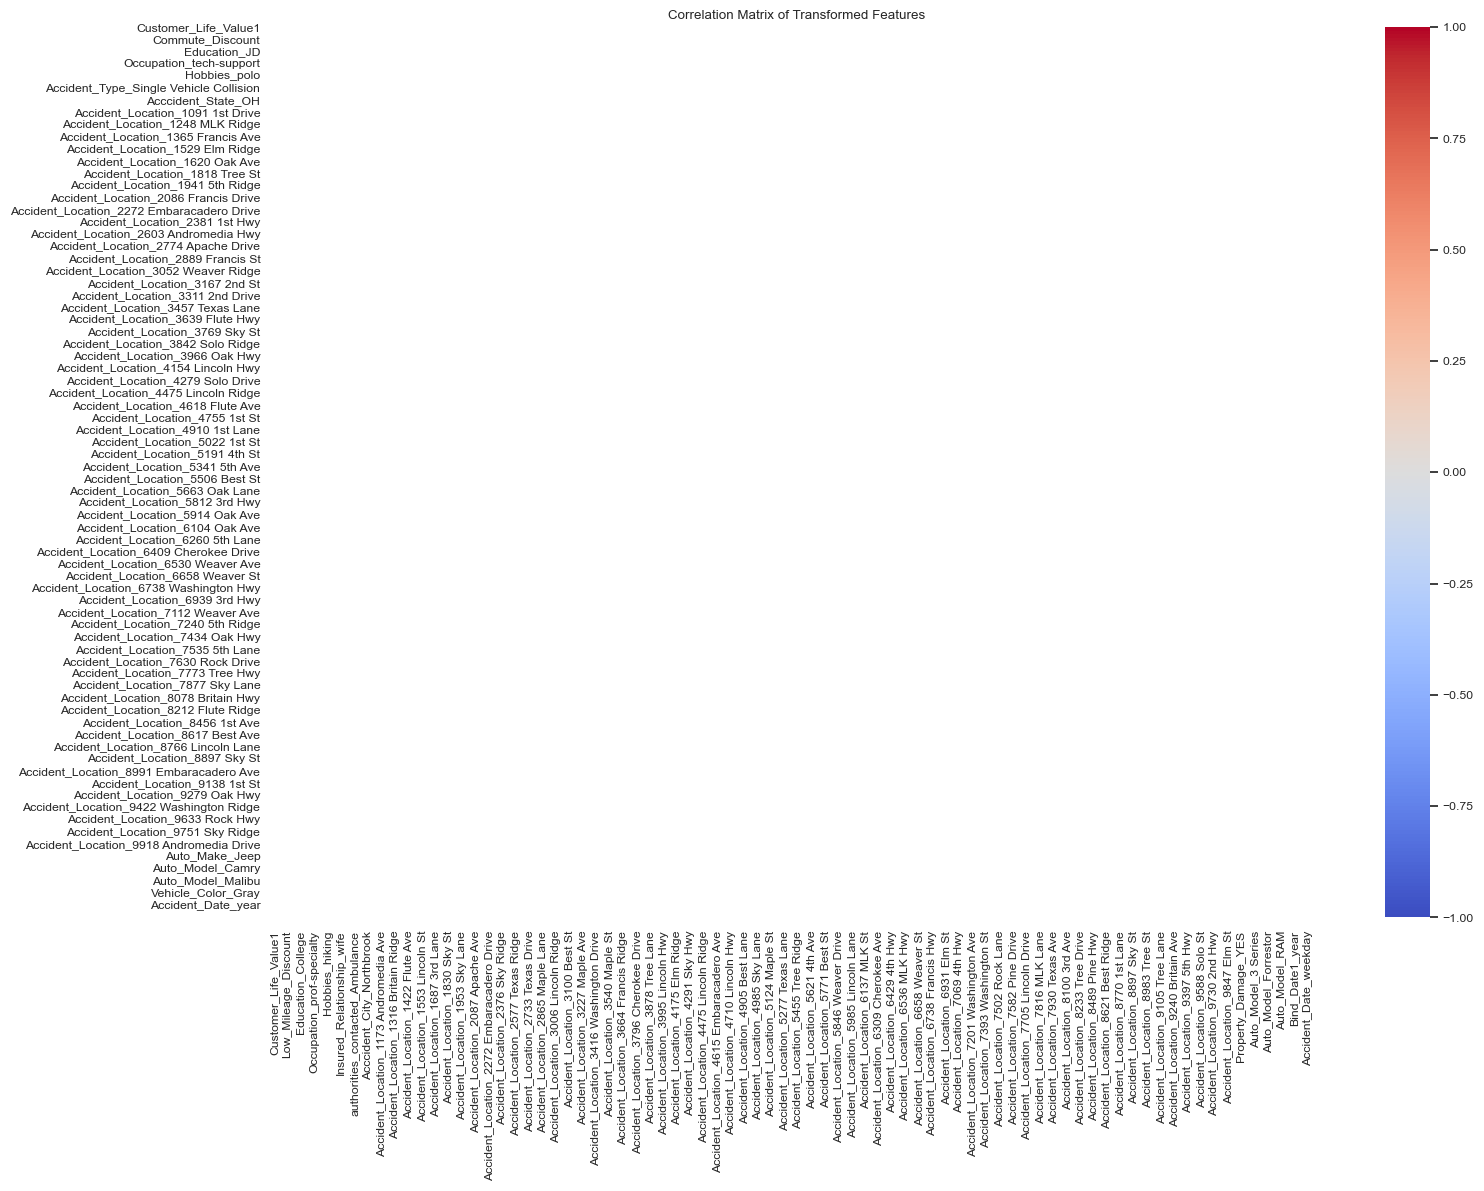

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df_transformed' is your final, numeric-only DataFrame
# If needed, exclude the target column ('Fraud_Ind') from correlation
features_only = df_transformed.drop(columns=['Fraud_Ind'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = features_only.corr()

# Set plot size and font scale
plt.figure(figsize=(16, 12))
sns.set(font_scale=0.8)

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Transformed Features')
plt.tight_layout()
plt.show()


In [47]:
from sklearn.feature_selection import VarianceThreshold

# Only apply on numeric columns (non-categorical)
numeric_df = df.select_dtypes(include=[np.number])

# Apply Variance Threshold (e.g., remove features with variance less than 0.01)
selector = VarianceThreshold(threshold=0.01)
reduced_array = selector.fit_transform(numeric_df)

# Get selected feature names
selected_columns = numeric_df.columns[selector.get_support()]

# Create new DataFrame with selected features
df_reduced = pd.DataFrame(reduced_array, columns=selected_columns)

print(f" Original shape: {numeric_df.shape}")
print(f" Reduced shape after Variance Threshold: {df_reduced.shape}")


 Original shape: (36953, 50)
 Reduced shape after Variance Threshold: (36953, 40)


Tree-based feature importance


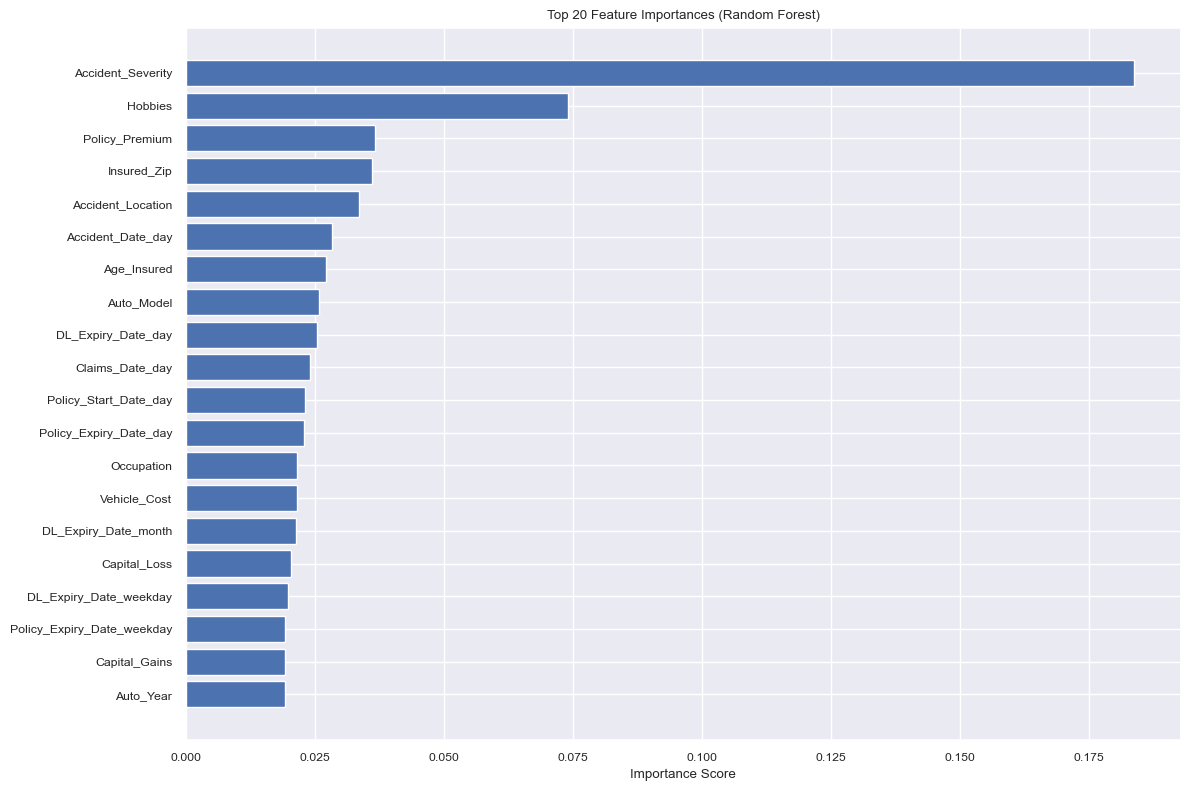

📊 Top 10 Important Features:

Accident_Severity     0.183745
Hobbies               0.074039
Policy_Premium        0.036700
Insured_Zip           0.036147
Accident_Location     0.033547
Accident_Date_day     0.028434
Age_Insured           0.027185
Auto_Model            0.025813
DL_Expiry_Date_day    0.025405
Claims_Date_day       0.024110
dtype: float64


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 2. Define features and target
# Change 'Fraud_Ind' to your actual target column name
if 'Fraud_Ind' in df_encoded.columns:
    X = df_encoded.drop('Fraud_Ind', axis=1)
    y = df_encoded['Fraud_Ind']
else:
    raise ValueError("Target column 'Fraud_Ind' not found in dataset.")

# 3. Split into train/test sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# 6. Plot top 20 features
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.barh(range(20), importances[indices][:20][::-1], align="center")
plt.yticks(range(20), [feature_names[i] for i in indices[:20]][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# 7. Print top 10 features
top_features = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)
print("📊 Top 10 Important Features:\n")
print(top_features)


* ✅ Recursive Feature Elimination (RFE)


In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Encode categorical features
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 2. Define features and target
if 'Fraud_Ind' in df_encoded.columns:
    X = df_encoded.drop('Fraud_Ind', axis=1)
    y = df_encoded['Fraud_Ind']
else:
    raise ValueError("Target column 'Fraud_Ind' not found in the dataset.")

# 3. Split the data (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize model and RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Select top 20 features (you can change this number)
rfe = RFE(estimator=model, n_features_to_select=20)
rfe.fit(X_train, y_train)

# 5. Get selected features
selected_features = X.columns[rfe.support_]

print("✅ Top 20 selected features by RFE:")
print(selected_features.tolist())


✅ Top 20 selected features by RFE:
['Age_Insured', 'Policy_Premium', 'Insured_Zip', 'Occupation', 'Hobbies', 'Capital_Loss', 'Collision_Type', 'Accident_Severity', 'Accident_Location', 'Auto_Make', 'Auto_Model', 'Vehicle_Cost', 'Policy_Start_Date_day', 'Policy_Expiry_Date_day', 'Policy_Expiry_Date_weekday', 'Accident_Date_day', 'DL_Expiry_Date_month', 'DL_Expiry_Date_day', 'DL_Expiry_Date_weekday', 'Claims_Date_day']


Marking the top 5 kpi


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 2. Define features and target
if 'Fraud_Ind' in df_encoded.columns:
    X = df_encoded.drop('Fraud_Ind', axis=1)
    y = df_encoded['Fraud_Ind']
else:
    raise ValueError("Target column 'Fraud_Ind' not found in dataset.")

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Get top 5 important features
importances = model.feature_importances_
feature_names = X.columns
top5_indices = importances.argsort()[::-1][:5]
top5_features = feature_names[top5_indices]
top5_importances = importances[top5_indices]

# 6. Display KPIs
print("✅ Top 5 KPIs for Fraud Detection:\n")
for i, (feature, score) in enumerate(zip(top5_features, top5_importances), 1):
    print(f"{i}. {feature} — Importance Score: {score:.4f}")


✅ Top 5 KPIs for Fraud Detection:

1. Accident_Severity — Importance Score: 0.1837
2. Hobbies — Importance Score: 0.0740
3. Policy_Premium — Importance Score: 0.0367
4. Insured_Zip — Importance Score: 0.0361
5. Accident_Location — Importance Score: 0.0335


# <a id='toc1_'></a>[<b>Model building</b>](#toc0_)


In [51]:
from sklearn.model_selection import train_test_split

# Assume df_encoded already has all categorical features encoded and 'Fraud_Ind' as target
if 'Fraud_Ind' in df_encoded.columns:
    X = df_encoded.drop('Fraud_Ind', axis=1)
    y = df_encoded['Fraud_Ind']
else:
    raise ValueError("Target column 'Fraud_Ind' not found in the dataset.")

# Step 1: Split into training+validation and test sets (80%/20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split training+validation into training and validation sets (75%/25% of 80%)
# => Final split: 60% train, 20% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Print the final shapes
print(f"✅ Training Set:     {X_train.shape}, Labels: {y_train.shape}")
print(f"✅ Validation Set:   {X_val.shape}, Labels: {y_val.shape}")
print(f"✅ Test Set:         {X_test.shape}, Labels: {y_test.shape}")


✅ Training Set:     (22171, 68), Labels: (22171,)
✅ Validation Set:   (7391, 68), Labels: (7391,)
✅ Test Set:         (7391, 68), Labels: (7391,)


In [52]:
# Ensure numeric type (float32) and numpy compatibility
X_train_np = X_train.astype('float32').values
X_val_np = X_val.astype('float32').values
y_train_np = y_train.values
y_val_np = y_val.values


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Extra Trees": ExtraTreesClassifier()
}

# Store evaluation results
results = []

for name, model in models.items():
    model.fit(X_train_np, y_train_np)
    y_pred = model.predict(X_val_np)

    acc = accuracy_score(y_val_np, y_pred)
    prec = precision_score(y_val_np, y_pred, zero_division=0)
    rec = recall_score(y_val_np, y_pred, zero_division=0)
    f1 = f1_score(y_val_np, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("✅ Model Performance on Validation Set:\n")
print(results_df)



C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


✅ Model Performance on Validation Set:

                 Model  Accuracy  Precision  Recall  F1 Score
1        Decision Tree    1.0000     1.0000  1.0000    1.0000
2        Random Forest    1.0000     1.0000  1.0000    1.0000
3              XGBoost    1.0000     1.0000  1.0000    1.0000
8             CatBoost    1.0000     1.0000  1.0000    1.0000
9          Extra Trees    1.0000     1.0000  1.0000    1.0000
7    Gradient Boosting    0.9568     0.9185  0.9049    0.9117
5                 k-NN    0.9061     0.8549  0.7449    0.7961
6          Naive Bayes    0.7475     0.1690  0.0066    0.0127
0  Logistic Regression    0.7539     0.0000  0.0000    0.0000
4                  SVM    0.7539     0.0000  0.0000    0.0000


C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


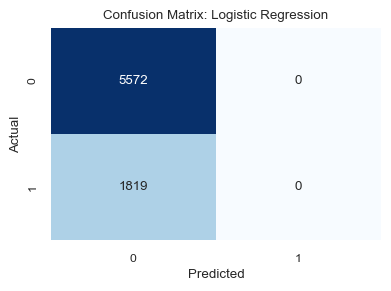

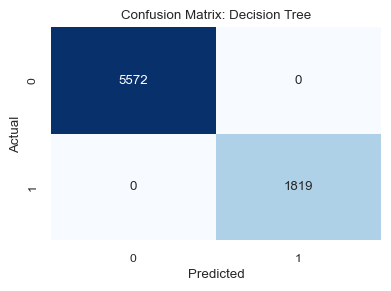

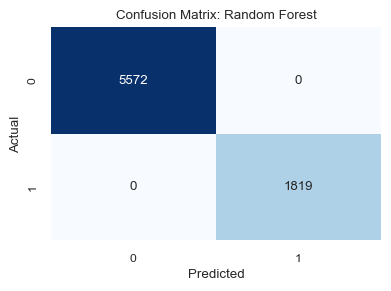

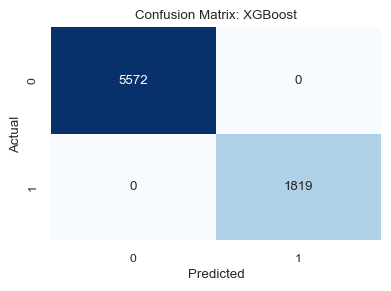

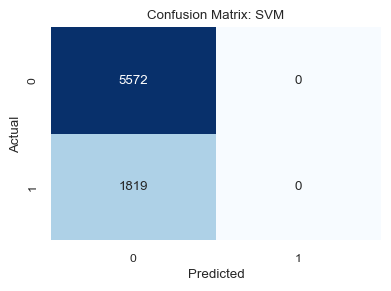

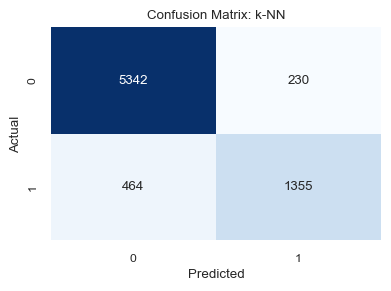

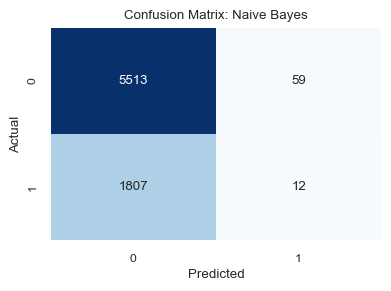

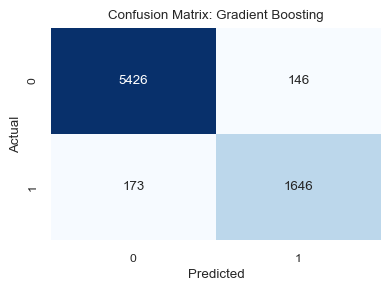

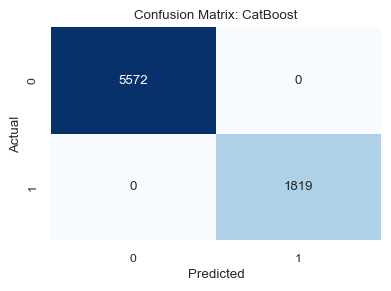

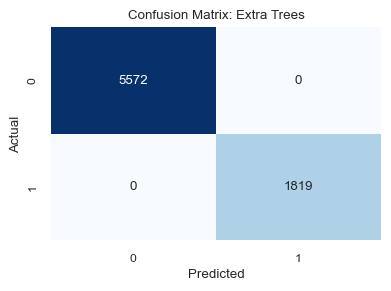

✅ Model Performance on Validation Set:

                 Model  Accuracy  Precision  Recall  F1 Score
1        Decision Tree    1.0000     1.0000  1.0000    1.0000
2        Random Forest    1.0000     1.0000  1.0000    1.0000
3              XGBoost    1.0000     1.0000  1.0000    1.0000
8             CatBoost    1.0000     1.0000  1.0000    1.0000
9          Extra Trees    1.0000     1.0000  1.0000    1.0000
7    Gradient Boosting    0.9568     0.9185  0.9049    0.9117
5                 k-NN    0.9061     0.8549  0.7449    0.7961
6          Naive Bayes    0.7475     0.1690  0.0066    0.0127
0  Logistic Regression    0.7539     0.0000  0.0000    0.0000
4                  SVM    0.7539     0.0000  0.0000    0.0000


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Extra Trees": ExtraTreesClassifier()
}

# Store evaluation results
results = []

for name, model in models.items():
    model.fit(X_train_np, y_train_np)
    y_pred = model.predict(X_val_np)

    acc = accuracy_score(y_val_np, y_pred)
    prec = precision_score(y_val_np, y_pred, zero_division=0)
    rec = recall_score(y_val_np, y_pred, zero_division=0)
    f1 = f1_score(y_val_np, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

    # Plot confusion matrix
    cm = confusion_matrix(y_val_np, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Display sorted performance table
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("✅ Model Performance on Validation Set:\n")
print(results_df)


# <a id='toc1_'></a>[<b>Evaluation matrix</b>](#toc0_)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    log_loss, matthews_corrcoef, cohen_kappa_score, confusion_matrix
)
import pandas as pd
import numpy as np

# ✅ STEP 1: Encode categorical variables (if not done already)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# ✅ STEP 2: Split features and target
X = df_encoded.drop('Fraud_Ind', axis=1)
y = df_encoded['Fraud_Ind']

from sklearn.model_selection import train_test_split

# 60% train, 20% val, 20% test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# ✅ STEP 3: Convert to numpy and ensure numeric types
X_train_np = X_train.astype('float32').values
X_val_np = X_val.astype('float32').values
y_train_np = y_train.values
y_val_np = y_val.values

# ✅ STEP 4: Define 10 models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Extra Trees": ExtraTreesClassifier()
}

# ✅ STEP 5: Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train_np, y_train_np)
    y_pred = model.predict(X_val_np)

    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val_np)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_val_np)
        y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())  # normalize
    else:
        y_proba = np.zeros_like(y_val_np)

    acc = accuracy_score(y_val_np, y_pred)
    prec = precision_score(y_val_np, y_pred, zero_division=0)
    rec = recall_score(y_val_np, y_pred, zero_division=0)
    f1 = f1_score(y_val_np, y_pred, zero_division=0)
    roc = roc_auc_score(y_val_np, y_proba) if len(np.unique(y_val_np)) > 1 else 0
    ll = log_loss(y_val_np, y_proba, labels=[0, 1], eps=1e-15)
    mcc = matthews_corrcoef(y_val_np, y_pred)
    kappa = cohen_kappa_score(y_val_np, y_pred)
    cm = confusion_matrix(y_val_np, y_pred).tolist()

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC AUC": round(roc, 4),
        "Log Loss": round(ll, 4),
        "MCC": round(mcc, 4),
        "Cohen's Kappa": round(kappa, 4),
        "Confusion Matrix": cm
    })

# ✅ STEP 6: Display results as DataFrame
metrics_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
pd.set_option('display.max_columns', None)
print("✅ Model Evaluation Results (Validation Set):\n")
print(metrics_df)


C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:

✅ Model Evaluation Results (Validation Set):

                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC  \
1        Decision Tree    1.0000     1.0000  1.0000    1.0000   1.0000   
2        Random Forest    1.0000     1.0000  1.0000    1.0000   1.0000   
3              XGBoost    1.0000     1.0000  1.0000    1.0000   1.0000   
8             CatBoost    1.0000     1.0000  1.0000    1.0000   1.0000   
9          Extra Trees    1.0000     1.0000  1.0000    1.0000   1.0000   
7    Gradient Boosting    0.9568     0.9185  0.9049    0.9117   0.9907   
5                 k-NN    0.9061     0.8549  0.7449    0.7961   0.9510   
6          Naive Bayes    0.7475     0.1690  0.0066    0.0127   0.5603   
0  Logistic Regression    0.7539     0.0000  0.0000    0.0000   0.5434   
4                  SVM    0.7539     0.0000  0.0000    0.0000   0.5751   

   Log Loss     MCC  Cohen's Kappa            Confusion Matrix  
1    0.0000  1.0000         1.0000      [[5572, 0], [0, 1819]]  
2    0.00

C:\Users\adita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


In [57]:
import pandas as pd

# results list is built dynamically in your evaluation loop (you already have it)
metrics_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)



In [58]:
results.append({
    "Model": name,
    "Accuracy": round(acc, 4),
    "Precision": round(prec, 4),
    "Recall": round(rec, 4),
    "F1 Score": round(f1, 4),
    "ROC AUC": round(roc, 4),
    "Log Loss": round(ll, 4),
    "MCC": round(mcc, 4),
    "Cohen's Kappa": round(kappa, 4),
    "Confusion Matrix": cm
})


<Figure size 1200x600 with 0 Axes>

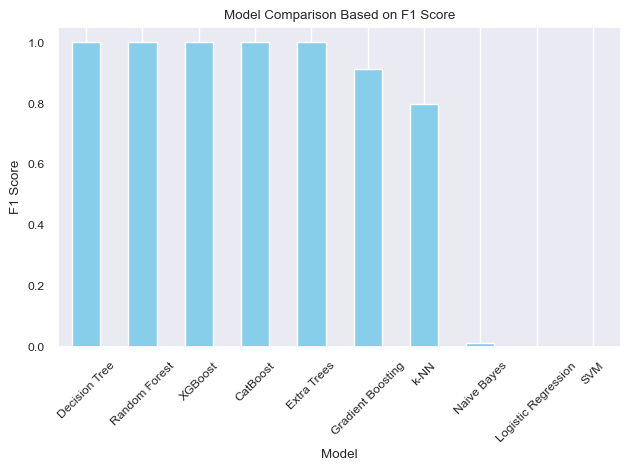

In [59]:
import matplotlib.pyplot as plt

# Plot F1 Score Comparison
plt.figure(figsize=(12, 6))
metrics_df.plot(x='Model', y='F1 Score', kind='bar', legend=False, color='skyblue')
plt.ylabel('F1 Score')
plt.title('Model Comparison Based on F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [60]:
print("✅ Model Evaluation Results:\n")
print(metrics_df)


✅ Model Evaluation Results:

                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC  \
1        Decision Tree    1.0000     1.0000  1.0000    1.0000   1.0000   
2        Random Forest    1.0000     1.0000  1.0000    1.0000   1.0000   
3              XGBoost    1.0000     1.0000  1.0000    1.0000   1.0000   
8             CatBoost    1.0000     1.0000  1.0000    1.0000   1.0000   
9          Extra Trees    1.0000     1.0000  1.0000    1.0000   1.0000   
7    Gradient Boosting    0.9568     0.9185  0.9049    0.9117   0.9907   
5                 k-NN    0.9061     0.8549  0.7449    0.7961   0.9510   
6          Naive Bayes    0.7475     0.1690  0.0066    0.0127   0.5603   
0  Logistic Regression    0.7539     0.0000  0.0000    0.0000   0.5434   
4                  SVM    0.7539     0.0000  0.0000    0.0000   0.5751   

   Log Loss     MCC  Cohen's Kappa            Confusion Matrix  
1    0.0000  1.0000         1.0000      [[5572, 0], [0, 1819]]  
2    0.0004  1.0000       

In [61]:
# Inside model loop in validation script (optional)
import joblib

# If this is the best model (e.g., highest F1)
joblib.dump(model, "best_model.pkl")
joblib.dump(X_train.columns.tolist(), "columns.pkl")

['columns.pkl']